In [1]:
import time
import logging
from fck import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd

2024-10-08 22:00:53.353928: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-08 22:00:53.500284: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-08 22:00:53.650095: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-08 22:00:53.783260: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-08 22:00:53.809463: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-08 22:00:53.974187: I tensorflow/core/platform/cpu_feature_gu

In [2]:
# Configure logging
logging.basicConfig(level=logging.INFO)

# Load your dataset and preprocess
df = pd.read_csv('/home/zaldi-zakaria/NN/archive/SOL.csv')

# Convert 'date' to datetime format and set it as index
df['time'] = pd.to_datetime(df['date'])
df.set_index('time', inplace=True)

# Select the columns to be scaled
data = df[["open", "high", "low", "close"]]

# Initialize MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit and transform the data
scaled_data = scaler.fit_transform(data)

In [3]:
def create_sequences(data, sequence_length):
    sequences, labels = [], []
    for i in range(len(data) - sequence_length):
        sequences.append(data[i:i + sequence_length, :])
        labels.append(data[i + sequence_length, 3])  # Only 'close' price as label
    return np.array(sequences), np.array(labels)

# Example usage:
sequence_length = 60
train_size = int(len(scaled_data) * 0.8)
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]

X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

In [4]:
model = Sequential([
    Input(shape=(X_train.shape[1], X_train.shape[2])),  # Input shape based on sequence length and number of features
    LSTM(50, activation='relu', return_sequences=True),  # LSTM layer with 50 units, relu activation, and return_sequences=True for sequences
    Dropout(0.2),  # Dropout layer to prevent overfitting
    LSTM(50, activation='relu'),  # Second LSTM layer
    Dropout(0.2),  # Another dropout layer
    Dense(1)  # Dense output layer with 1 neuron (assuming you're predicting a single value)
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

In [5]:
# Fit the model
history = model.fit(X_train, y_train,
                    epochs=100, batch_size=32,
                    validation_data=(X_test, y_test),
                    verbose=1)


Epoch 1/100


40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 59ms/step - loss: 0.0462 - val_loss: 0.0061
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0055 - val_loss: 0.0067
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.0047 - val_loss: 0.0044
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0040 - val_loss: 0.0082
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0044 - val_loss: 0.0034
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0026 - val_loss: 0.0037
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.0027 - val_loss: 0.0024
Epoch 8/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0029 - val_loss: 0.0022
Epoch 9/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.0030 - val_loss: 0.0023
Epoch 10/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0025 - val_loss: 0.0023
Epoch 11/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0028 - val_loss: 0.0022
Epoch 12/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0

In [6]:
#save or load model
model.save('mod.h5')
print("Model saved successfully.")

#model = load_model('mode.h5')

Model saved successfully.


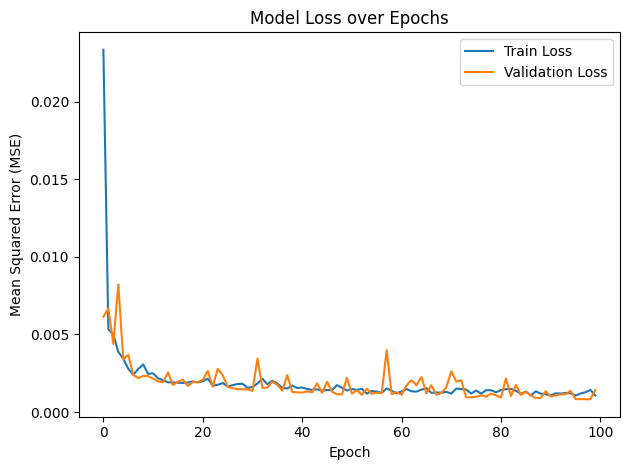

In [13]:
# Assuming `history` is already defined from your training process
plot_training_history(history)

[*********************100%***********************]  1 of 1 completed
INFO:root:Updated candle_data: [[144.10096740722656, 144.10096740722656, 144.10096740722656, 144.10096740722656], [144.12686157226562, 144.12686157226562, 144.12686157226562, 144.12686157226562], [144.08004760742188, 144.08004760742188, 144.08004760742188, 144.08004760742188], [144.09364318847656, 144.09364318847656, 144.09364318847656, 144.09364318847656], [143.92601013183594, 143.92601013183594, 143.92601013183594, 143.92601013183594]]
INFO:root:Candle data length: 868


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━

INFO:root:Predicted next close prices: [144.0511181669608, 144.0516734058965, 144.08628817488352, 144.13682058560153, 144.19165120750768]


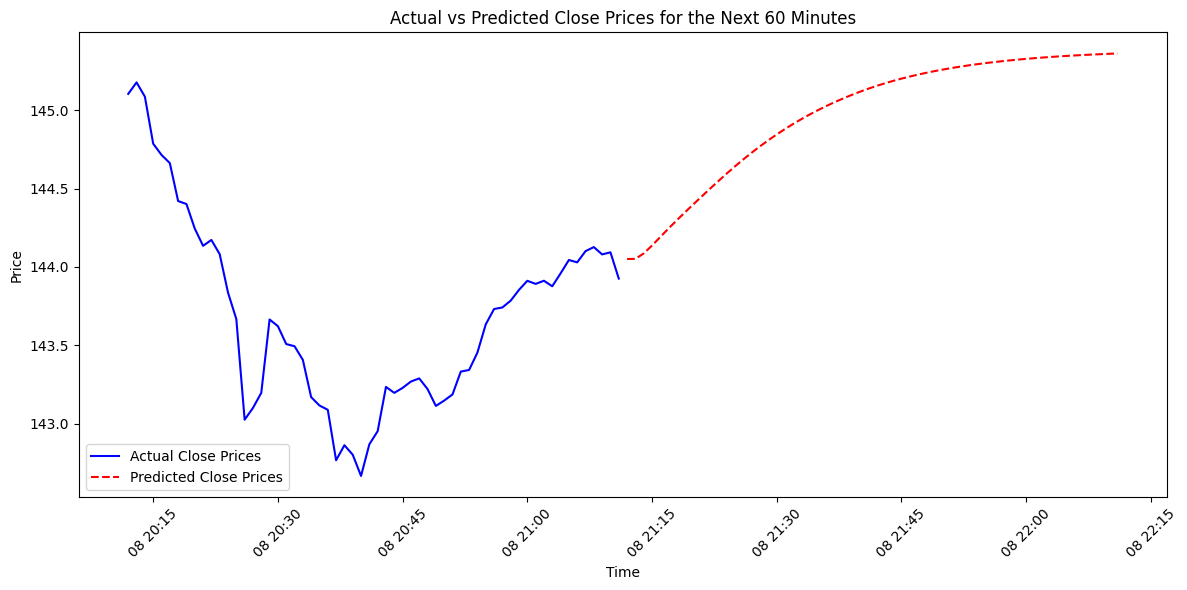

In [15]:
# Main prediction loop
while True:
    try:
        # Fetch latest candle data
        update_candle_data()
        
        # Predict prices for the next 60 minutes
        predicted_prices = predict_prices_for_60_minutes()
        
        if predicted_prices is not None:
            logging.info(f"Predicted next close prices: {predicted_prices[:5]}")
        
        # Mock actual prices (replace with actual data fetching)
        actual_prices = np.random.rand(60) * 100
        
        # Plot actual vs predicted prices
        plot_predictions(actual_prices, predicted_prices)
        
        # Wait for 1 hour
        time.sleep(3600)
        
    except KeyboardInterrupt:
        print("Prediction loop stopped.")
        break
    except Exception as e:
        logging.error(f"An error occurred: {e}")